In [2]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from ipywidgets import interactive, FloatSlider, IntSlider, HBox, interactive_output

In [3]:
# read in suitability 
df_burden = pd.read_csv("../../data/df_suit_means_pop_wght_pop_size_who_regions.csv")
df_burden.head()

,country_name,country_code,region_name,region_code,mean_suit,mean_pop_weighted,pop_size,p_spillover
0,Afghanistan,AFG,Eastern Mediterranean,EMR,0.080765,0.143039,3.885903e+07,0.001473
1,Angola,AGO,Africa,AFR,0.416124,0.429000,3.238916e+07,0.004418
2,Albania,ALB,Europe,EUR,0.155770,0.272865,2.851804e+06,0.002810
3,Andorra,AND,Europe,EUR,0.061366,0.055334,7.716108e+04,0.000570
4,United Arab Emirates,ARE,Eastern Mediterranean,EMR,0.112225,0.161808,9.534323e+06,0.001666


In [4]:
# mobility data (daily trips between src and dest)
# mobility info for 188 countries
mat_mob_daily_trips = pd.read_csv("../../data/df_mat_mob_n_daily_trips.csv")
all_codes = mat_mob_daily_trips.columns.tolist()
print('Total n countries:', len(all_codes))

Total n countries: 188


In [5]:
# ensure mobility data and suitability data are matched 
# since there are fewer countries on the mobility data set 
# 220 vs 188 (suit vs mobility)
# final number is 184 for some reason
df_burden = df_burden[df_burden["country_code"].isin(all_codes)].dropna()
print('Total countries with suitability:', df_burden.shape)
suit_vals = np.array(df_burden['mean_pop_weighted'].tolist())

Total countries with suitability: (184, 8)


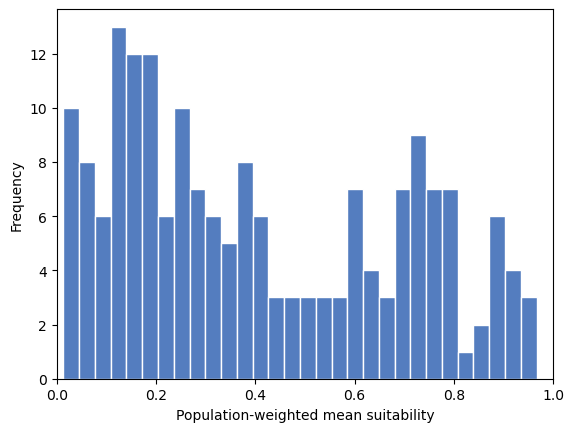

In [6]:
plt.hist(suit_vals, bins=30, color='#547dbf', edgecolor='white')

plt.xlabel('Population-weighted mean suitability')
plt.ylabel('Frequency')
plt.xlim(0, 1);

In [11]:
def plot_suit_transform(fact_f, fact_k):
    suit_vals_new = fact_f*suit_vals**fact_k
    plt.hist(suit_vals_new, bins=30, color='#547dbf', edgecolor='white')
    plt.xlabel('Population-weighted mean suitability')
    plt.ylabel('Frequency')
    # plt.xlim(0, 1); # typical
    plt.xlim(0, 0.2); # typical

# initial values 
fact_f = 1
fact_k = 1

# widgets
fact_f_widget = FloatSlider(min=0.05, max=1, step=0.05, value=fact_f, readout_format='.2f')
fact_f_widget.continuous_update=False

fact_k_widget = FloatSlider(min=1, max=10, step=0.05, value=fact_k, readout_format='.2f')
fact_k_widget.continuous_update=False

# interactive plot with sliders 
interactive(plot_suit_transform, fact_f=fact_f_widget, fact_k=fact_k_widget)

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='fact_f', max=1.0, min=0.05,…